<div style="text-align: right">정보통계학과 2018015030 이광진</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
health=pd.read_csv("health.csv")

In [3]:
health.shape

(97787, 113)

In [4]:
print(health.head())

    학년도      최종가중치  학교ID  strata         도시규모   공학여부  시도 학교급  학년  반  ...  \
0  2021  34.687664   706     129  1. 대도시/중소도시  1. 공학  충북   초   1  1  ...   
1  2021  41.323936   384     104  1. 대도시/중소도시  1. 공학  대전   초   1  1  ...   
2  2021  24.419891  1063     123  1. 대도시/중소도시  1. 공학  제주   초   1  1  ...   
3  2021  22.338629   481     109  1. 대도시/중소도시  1. 공학  세종   초   1  3  ...   
4  2021  43.717056   826     120  1. 대도시/중소도시  1. 공학  전북   초   1  1  ...   

   가족음주 흡연음주전문가상담희망  무기력감  수업태도교정  과잉행동  주의력산만 성문제전문가상담희망  진로고민  상담요청_초  \
0   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
1   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
2   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
3   2.0         NaN   2.0     2.0   2.0    2.0        NaN   NaN     2.0   
4   2.0         NaN   2.0     2.0   1.0    2.0        NaN   NaN     2.0   

   상담요청_중고  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 113

In [5]:
health.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97787 entries, 0 to 97786
Data columns (total 113 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    학년도             97787 non-null  int64  
 1    최종가중치           97787 non-null  float64
 2    학교ID            97787 non-null  int64  
 3    strata          97787 non-null  int64  
 4    도시규모            97787 non-null  object 
 5    공학여부            97787 non-null  object 
 6    시도              97787 non-null  object 
 7    학교급             97787 non-null  object 
 8    학년              97787 non-null  int64  
 9    반               97787 non-null  int64  
 10   순번              97787 non-null  int64  
 11   성별              97787 non-null  object 
 12   생년월일            97787 non-null  int64  
 13   건강검진일           97786 non-null  float64
 14   키               97787 non-null  float64
 15   몸무게             97787 non-null  float64
 16   척추              32230 non-null  object 
 17   시력_나안_좌   

In [6]:
health=health.rename(columns={"주3회이상운동":"주3회이상운동_초",  "하루30분이상운동":"하루30분이상운동_중고",
                             "외상치료경험":"외상치료경험_중고","하루tv시청2시간이상":"하루tv시청2시간이상_초",
                             "음란물채팅":"음란물채팅_중고","현금갈취":"현금갈취_초",
                             "신체접촉":"신체접촉_초","고민상담대상":"고민상담대상_중고",
                             "가족지지":"가족지지_초","체벌경험":"체벌경험_초",
                             "폭력위협":"폭력위협_중고","가족흡연":"가족흡연_초",
                             "가족음주":"가족음주_초","흡연음주전문가상담희망":"흡연음주전문가상담희망_중고",
                             "무기력감":"무기력감_초","수업태도교정":"수업태도교정_초",
                             "성문제전문가상담희망":"성문제전문가상담희망_중고",
                             "진로고민":"진로고민_중고","과잉행동":"과잉행동_부모님란",
                             "주의력산만":"주의력산만_부모님란"})

In [7]:
health.columns

Index(['학년도', '최종가중치', '학교ID', 'strata', '도시규모', '공학여부', '시도', '학교급', '학년',
       '반',
       ...
       '가족음주_초', '흡연음주전문가상담희망_중고', '무기력감_초', '수업태도교정_초', '과잉행동_부모님란',
       '주의력산만_부모님란', '성문제전문가상담희망_중고', '진로고민_중고', '상담요청_초', '상담요청_중고'],
      dtype='object', length=113)

In [8]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_row",45)

* **열과 행이 너무 길어 확인할 수 있는 열의 범위와 행의 범위를 늘려준다.**

### (2) drop(불필요한 열 제거)

In [9]:
health_drop=health[[#'학년도', '최종가중치', '학교ID', 'strata', #'공학여부', #'반', '순번', 
        '도시규모',  '시도', '학교급', '학년','성별', '키', '몸무게','수축기', '이완기',
   #'생년월일', '건강검진일', # '척추', '시력_나안_좌',# '허리둘레', '기타', '건강검진_종합소견',
       #'시력_나안_우', '시력_교정_좌', '시력_교정_우', '안질환', '청력_좌', '청력_우', '귓병', '콧병',
       #'목병', '피부병', '요단백', '요잠혈',  #'혈당(식전)(mg_dl)', '총콜레스테롤(mg_dl)',
       #'hdl(mg_dl)', '중성지방(mg_dl)', 'ldl(mg_dl)', 'AST(U_L)', 'ALT(U_L)',  '혈색소(g_dl)', '결핵흉부방사선검사',   
       '충치치아_유무', '충치치아_개수_상', '충치치아_개수_하', '충치발생위험치아_유무', '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하', '결손치아영구치아_유무', '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',
       #'구내염및연조직질환', '부정교합', '구강위생상태', '그밖의치아상태', '치주질환잇몸병_유무', '치주질환_종류',
       #'턱관절이상', '치아마모증', '제3대구치사랑니', '구강검진_종합소견', '구강검진일',# '하루30분이상운동_중',
        '라면', '음료수','패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사', '다이어트경험_답변1',  
       '다이어트경험_답변2', '다이어트경험_답변3', '다이어트경험_답변4', '주3회이상운동_초','하루수면량',
        #'자아신체상(체형)', '손씻기', '양치질', '안전벨트착용', '안전장비착용', '외상치료경험_중고',# '상담희망_중고',
       '하루tv시청2시간이상_초', '하루2시간이상게임_초', '상담희망_초',   '가족흡연_초',   '가족음주_초',
    '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초', '가출생각_초', '가족지지_초', '체벌경험_초',   
       #'폭력위협_중고', #'괴롭힘따돌림_중고',#'가출생각_중고', '고민상담대상_중고',# '하루2시간이상게임_중고', '음란물채팅_중고', ,  '가정문제걱정'
    # '흡연음주전문가상담희망_중고',# '과잉행동_부모님란','주의력산만_부모님란', #'성문제전문가상담희망_중고', '진로고민_중고', #, '상담요청_중고']]
    '무기력감_초', '수업태도교정_초','상담요청_초']]

In [10]:
health_drop.columns

Index(['도시규모', '시도', '학교급', '학년', '성별', '키', '몸무게', '수축기', '이완기', '충치치아_유무',
       '충치치아_개수_상', '충치치아_개수_하', '충치발생위험치아_유무', '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하', '결손치아영구치아_유무', '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',
       '라면', '음료수', '패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사',
       '다이어트경험_답변1', '다이어트경험_답변2', '다이어트경험_답변3', '다이어트경험_답변4', '주3회이상운동_초',
       '하루수면량', '하루tv시청2시간이상_초', '하루2시간이상게임_초', '상담희망_초', '가족흡연_초', '가족음주_초',
       '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초', '가출생각_초', '가족지지_초', '체벌경험_초', '무기력감_초',
       '수업태도교정_초', '상담요청_초'],
      dtype='object')

### (3) data manipulation

In [11]:
health_drop_ele=health_drop[health_drop['학교급']=='초']
health_drop_ele=health_drop_ele.copy()

In [12]:
health_drop_ele['bmi']=health_drop_ele['몸무게']/((health_drop_ele['키']/100)**2)
health_drop_ele['bmi']

0        16.528926
1        17.888637
2        18.269083
3        15.802112
4        16.148774
           ...    
38443    23.808022
38444    17.426325
38445    20.692479
38446    21.316255
38447    18.569532
Name: bmi, Length: 38448, dtype: float64

In [13]:
health_drop_ele.describe()

,학년,키,몸무게,수축기,이완기,충치치아_개수_상,충치치아_개수_하,충치발생위험치아_개수_상,충치발생위험치아_개수_하,결손치아영구치아__개수_상,결손치아영구치아__개수_하,라면,음료수,패스트푸드,육류,우유유제품,과일,채소(김치제외),아침식사,다이어트경험_답변1,다이어트경험_답변2,다이어트경험_답변3,다이어트경험_답변4,주3회이상운동_초,하루수면량,하루tv시청2시간이상_초,하루2시간이상게임_초,상담희망_초,가족흡연_초,가족음주_초,괴롭힘따돌림_초,현금갈취_초,신체접촉_초,가출생각_초,가족지지_초,체벌경험_초,무기력감_초,수업태도교정_초,상담요청_초,bmi
count,38448.000000,38448.000000,38448.000000,12105.000000,12105.000000,18568.000000,18399.000000,17365.000000,17417.000000,14720.000000,14775.000000,37333.000000,37333.000000,37330.000000,37333.000000,37332.000000,37332.000000,37330.000000,37288.000000,23802.0,5776.0,175.0,10338.0,37297.000000,37331.000000,37320.000000,37350.000000,37330.000000,37329.000000,37329.000000,37332.000000,37329.000000,37329.000000,37332.000000,37346.000000,37346.000000,37326.000000,37347.000000,37335.000000,38448.000000
mean,3.497321,137.735079,37.094083,97.099314,59.295679,0.537268,0.498179,0.350993,0.368663,0.010870,0.020846,1.858784,2.091313,1.795339,2.705381,2.961534,2.948382,2.823841,1.650933,1.0,2.0,3.0,4.0,1.410060,3.378077,1.668891,1.613253,1.985534,1.642985,1.857885,1.968311,1.996196,1.987811,1.950230,1.104241,1.971965,1.961823,1.964522,1.973189,19.058053
std,1.703667,12.275926,12.476537,13.288884,10.331656,1.067804,0.993448,0.744623,0.753716,0.133484,0.185719,0.499853,0.711219,0.517900,0.692417,0.911014,0.834445,0.883615,0.947527,0.0,0.0,0.0,0.0,0.491851,0.773348,0.470960,0.487011,0.119401,0.479126,0.349172,0.175172,0.061560,0.109730,0.217472,0.305578,0.165075,0.191626,0.184987,0.161534,3.858631
min,1.000000,101.900000,14.600000,11.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,2.0,3.0,4.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.455774
25%,2.000000,128.000000,27.400000,90.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,2.0,3.0,4.0,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,16.083750
50%,4.000000,137.100010,34.799999,98.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.0,2.0,3.0,4.0,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,18.290888
75%,5.000000,147.000000,44.400002,104.000000,64.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,2.000000,1.0,2.0,3.0,4.0,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,21.338249
max,6.000000,179.800000,110.600000,914.000000,663.000000,11.000000,9.000000,8.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.0,2.0,3.0,4.0,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,38.806522


### (5) 변수 추가 및 data manipulation

In [14]:
def condition(data) :
    if data['성별']=='남':
        if data['학년'] == 1:
            if data['bmi'] < 13.93:
                val = '저체중'
            elif 13.93 <= data['bmi'] < 18.86:
                val = '정상'
            elif 18.86 <= data['bmi'] < 20.93:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 2:
            if data['bmi'] < 14.06:
                val = '저체중'
            elif 14.06 <= data['bmi'] < 19.80:
                val = '정상'
            elif 19.80 <= data['bmi'] < 22.13:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 3:
            if data['bmi'] < 14.27:
                val = '저체중'
            elif 14.27 <= data['bmi'] < 20.76:
                val = '정상'
            elif 20.76 <= data['bmi'] < 23.34:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 4:
            if data['bmi'] < 14.57:
                val = '저체중'
            elif 14.57 <= data['bmi'] < 21.71:
                val = '정상'
            elif 21.71 <= data['bmi'] < 24.48:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 5:
            if data['bmi'] < 14.93:
                val = '저체중'
            elif 14.93 <= data['bmi'] < 22.57:
                val = '정상'
            elif 22.57 <= data['bmi'] < 25.5:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 6:
            if data['bmi'] < 15.35:
                val = '저체중'
            elif 15.35 <= data['bmi'] < 23.32:
                val = '정상'
            elif 23.32 <= data['bmi'] < 26.35:
                val = '과체중'
            else :
                val = '비만'
            return val
    else :
        if data['학년'] == 1:
            if data['bmi'] < 13.63:
                val = '저체중'
            elif 13.63 <= data['bmi'] < 18.27:
                val = '정상'
            elif 18.27 <= data['bmi'] < 20.05:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 2:
            if data['bmi'] < 13.77:
                val = '저체중'
            elif 13.77 <= data['bmi'] < 19.05:
                val = '정상'
            elif 19.05 <= data['bmi'] < 21.05:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 3:
            if data['bmi'] < 14.01:
                val = '저체중'
            elif 14.01 <= data['bmi'] < 19.88:
                val = '정상'
            elif 19.88 <= data['bmi'] < 22.09:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 4:
            if data['bmi'] < 14.33:
                val = '저체중'
            elif 14.33 <= data['bmi'] < 20.71:
                val = '정상'
            elif 20.71 <= data['bmi'] < 23.08:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 5:
            if data['bmi'] < 14.73:
                val = '저체중'
            elif 14.73 <= data['bmi'] < 21.51:
                val = '정상'
            elif 21.51 <= data['bmi'] < 23.99:
                val = '과체중'
            else :
                val = '비만'
            return val
        elif data['학년'] == 6:
            if data['bmi'] < 15.20:
                val = '저체중'
            elif 15.2 <= data['bmi'] < 22.22:
                val = '정상'
            elif 22.22 <= data['bmi'] < 24.77:
                val = '과체중'
            else :
                val = '비만'
            return val

In [15]:
health_drop_ele['bmi_등급']=health_drop_ele.apply(condition,axis=1)

In [16]:
health_drop_ele['bmi_등급']

0         정상
1         정상
2         정상
3         정상
4         정상
        ... 
38443    과체중
38444     정상
38445     정상
38446     정상
38447     정상
Name: bmi_등급, Length: 38448, dtype: object

In [17]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

### (7) 데이터 타입 변경, 결측값 대치

<AxesSubplot: >

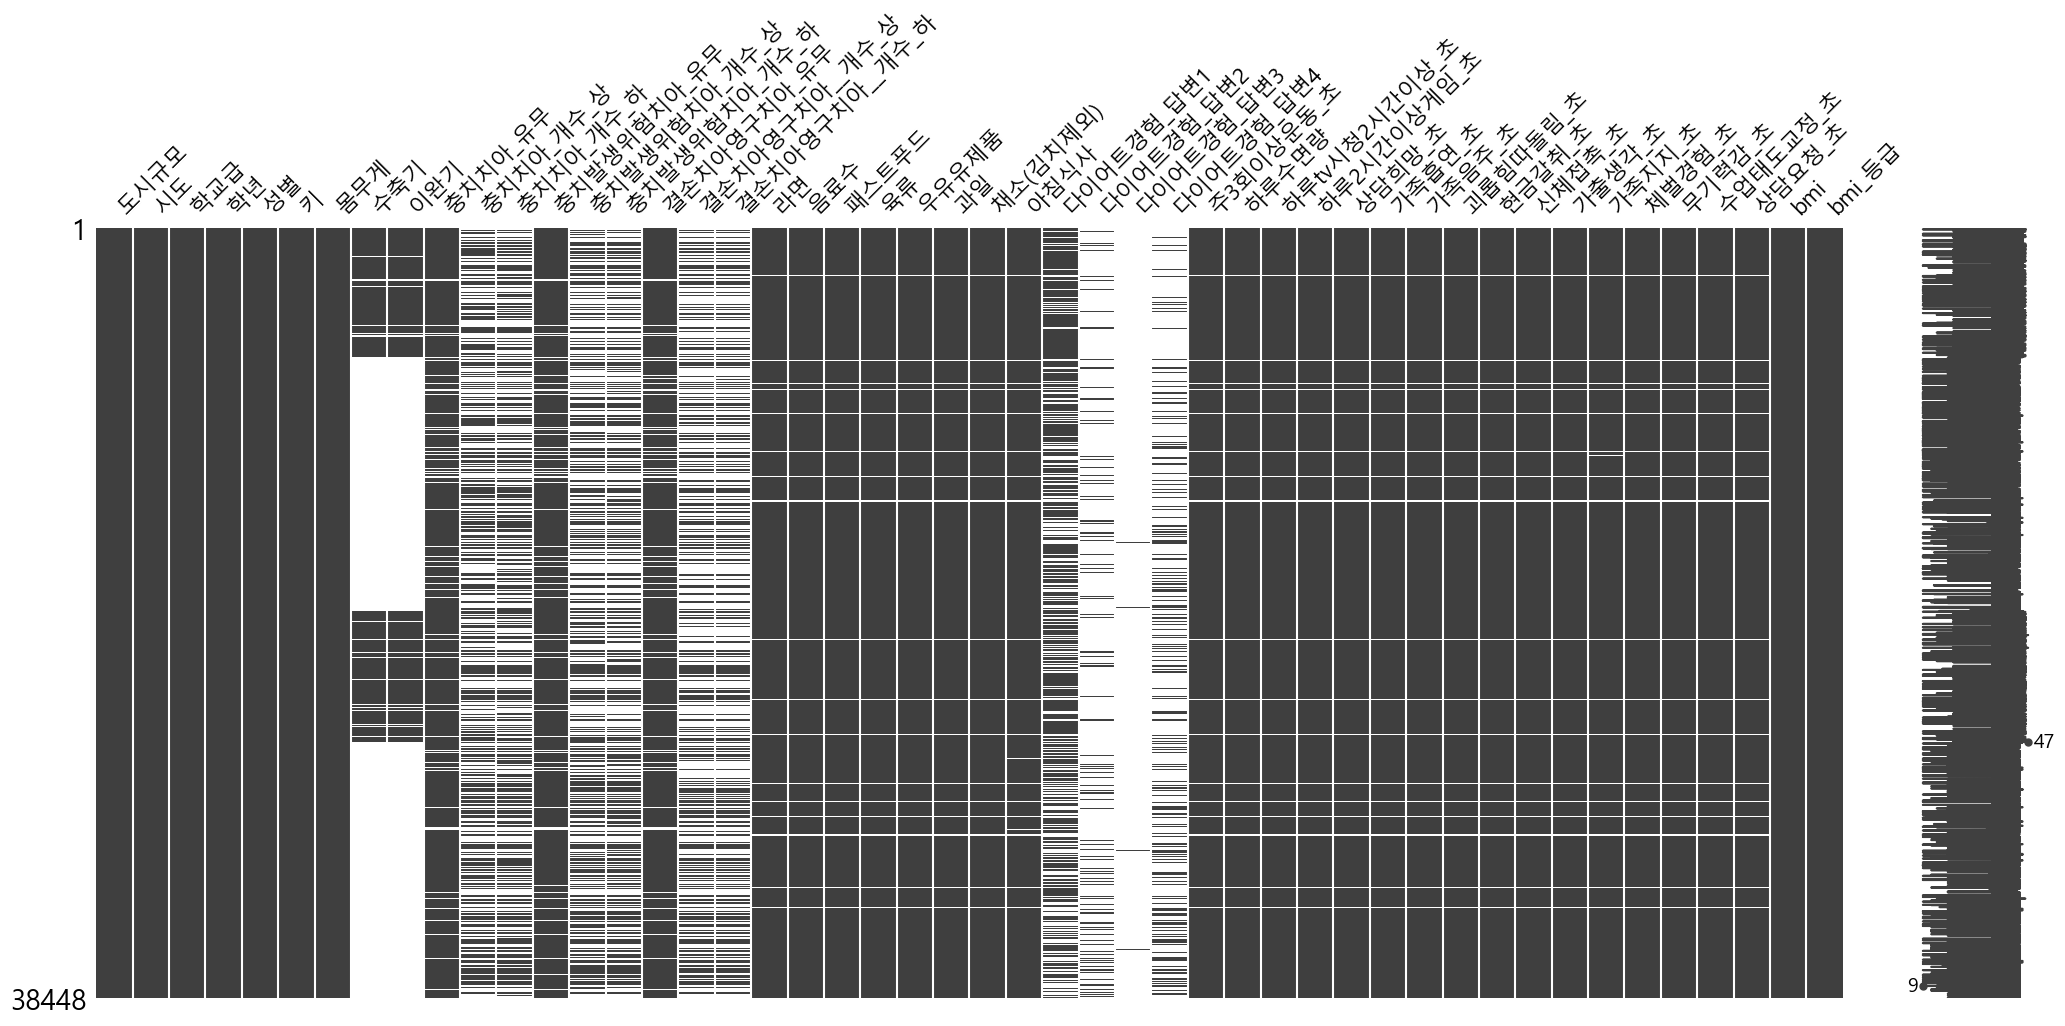

In [18]:
import missingno as msno
import matplotlib.pyplot as plt

# 예시 데이터셋을 사용하거나 실제 데이터셋을 불러와서 사용합니다.
# 예시 데이터셋을 사용하려면 seaborn 라이브러리를 설치해야 합니다.
# pip install seaborn
import seaborn as sns

msno.matrix(health_drop_ele)

In [19]:
float_cols_to_convert=['하루tv시청2시간이상_초', '하루2시간이상게임_초', '괴롭힘따돌림_초', '현금갈취_초', '신체접촉_초',
       '가출생각_초', '가족지지_초', '체벌경험_초', '상담희망_초', '가족흡연_초', '가족음주_초', '무기력감_초',
       '수업태도교정_초', '상담요청_초']
health_drop_ele.dropna(subset=float_cols_to_convert,inplace=True)

health_drop_ele.loc[:, float_cols_to_convert] = health_drop_ele.loc[:, float_cols_to_convert].round().astype(int)

In [20]:
float_cols=['충치치아_개수_상', '충치치아_개수_하',  '충치발생위험치아_개수_상',
       '충치발생위험치아_개수_하',  '결손치아영구치아__개수_상', '결손치아영구치아__개수_하',]
health_drop_ele.dropna(subset=float_cols, inplace=True)
health_drop_ele.loc[:, float_cols] = health_drop_ele.loc[:, float_cols].round().astype(int)

In [21]:
float_cols=['라면', '음료수', '패스트푸드', '육류', '우유유제품', '과일', '채소(김치제외)', '아침식사',"하루수면량","주3회이상운동_초"]
health_drop_ele.dropna(subset=float_cols, inplace=True)
health_drop_ele[float_cols] = health_drop_ele[float_cols].astype(int)

In [22]:
health_drop_ele_tv=health_drop_ele[health_drop_ele['하루tv시청2시간이상_초']==4]
health_drop_ele.drop(index=health_drop_ele_tv.index, inplace=True)

In [23]:
health_drop_ele.dropna(subset=['수축기','이완기','충치치아_유무','충치발생위험치아_유무','결손치아영구치아_유무'],inplace=True)
a=health_drop_ele[health_drop_ele['충치치아_유무']=="검사안함"]
health_drop_ele.drop(index=a.index,inplace=True)

In [24]:
health_drop_ele['다이어트경험_답변1'] = health_drop_ele['다이어트경험_답변1'].fillna(0).astype(int)

health_drop_ele['다이어트경험_답변2'] = health_drop_ele['다이어트경험_답변2'].fillna(0).astype(int)
health_drop_ele['다이어트경험_답변2'] = health_drop_ele['다이어트경험_답변2'].replace(2, 1)

health_drop_ele['다이어트경험_답변3'] = health_drop_ele['다이어트경험_답변3'].fillna(0).astype(int)
health_drop_ele['다이어트경험_답변3'] = health_drop_ele['다이어트경험_답변3'].replace(3, 1)

health_drop_ele['다이어트경험_답변4'] = health_drop_ele['다이어트경험_답변4'].fillna(0).astype(int)
health_drop_ele['다이어트경험_답변4'] = health_drop_ele['다이어트경험_답변4'].replace(4, 1)

In [25]:
health_drop_ele.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4766 entries, 12 to 25686
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   도시규모            4766 non-null   object 
 1   시도              4766 non-null   object 
 2   학교급             4766 non-null   object 
 3   학년              4766 non-null   int64  
 4   성별              4766 non-null   object 
 5   키               4766 non-null   float64
 6   몸무게             4766 non-null   float64
 7   수축기             4766 non-null   float64
 8   이완기             4766 non-null   float64
 9   충치치아_유무         4766 non-null   object 
 10  충치치아_개수_상       4766 non-null   int32  
 11  충치치아_개수_하       4766 non-null   int32  
 12  충치발생위험치아_유무     4766 non-null   object 
 13  충치발생위험치아_개수_상   4766 non-null   int32  
 14  충치발생위험치아_개수_하   4766 non-null   int32  
 15  결손치아영구치아_유무     4766 non-null   object 
 16  결손치아영구치아__개수_상  4766 non-null   int32  
 17  결손치아영구치아__개수_하  4766 non-null  

### (8) 인코딩

In [26]:
health_drop_ele.replace({'충치치아_유무': {'무': 0}}, inplace = True)
health_drop_ele.replace({'충치치아_유무': {'유': 1}}, inplace = True)
health_drop_ele.replace({'충치발생위험치아_유무': {'무': 0}}, inplace = True)
health_drop_ele.replace({'충치발생위험치아_유무': {'유': 1}}, inplace = True)
health_drop_ele.replace({'결손치아영구치아_유무': {'무': 0}}, inplace = True)
health_drop_ele.replace({'결손치아영구치아_유무': {'유': 1}}, inplace = True)

### (9) 이상치 제거

In [27]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [28]:
health_drop_ele_e=health_drop_ele["이완기"][health_drop_ele['이완기']<20]
health_drop_ele.drop(index=health_drop_ele_e.index, inplace=True)
# sns.boxplot(y=health_drop_ele['이완기'])

In [29]:
health_drop_ele_su=health_drop_ele["수축기"][health_drop_ele['수축기']<40]
health_drop_ele.drop(index=health_drop_ele_su.index, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

health_drop_ele['bmi_등급_encoded'] = label_encoder.fit_transform(health_drop_ele['bmi_등급'])
health_drop_ele['시도'] = label_encoder.fit_transform(health_drop_ele['시도'])
health_drop_ele['도시규모'] = label_encoder.fit_transform(health_drop_ele['도시규모'])
health_drop_ele['성별'] = label_encoder.fit_transform(health_drop_ele['성별'])

health_drop_ele[['bmi_등급','bmi_등급_encoded']]

,bmi_등급,bmi_등급_encoded
12,저체중,2
15,과체중,0
16,정상,3
17,과체중,0
19,과체중,0
...,...,...
25661,과체중,0
25671,정상,3
25672,정상,3
25673,정상,3


In [32]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# features = [['이완기', '수축기']]
# for feature in features:
#     health_drop_ele[feature] = scaler.fit_transform(health_drop_ele[feature])

In [33]:
health_drop_ele=health_drop_ele.reset_index(drop=True)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 분류 분석

## OVERSAMPLING

## SMOTE

# 성능향상 - 다양한 모델 적용 및 하이퍼파라미터 조정

In [35]:
from autogluon.tabular import TabularPredictor

In [36]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급',
                                                  '학교급',
                                                 ])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train1, X_test, y_train1, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [39]:
# train = health_drop_ele.drop(columns=['키','몸무게','bmi','bmi_등급','학교급'])
X_train1['bmi_등급_encoded']=y_train1
predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
                             , path='ag_models29')

# Fit AutoGluon on the training data
predictor.fit(X_train1)

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

Beginning AutoGluon training ...
AutoGluon will save models to "ag_models29\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
Disk Space Avail:   905.21 GB / 1000.77 GB (90.5%)
Train Data Rows:    3812
Train Data Columns: 43
Label Column: bmi_등급_encoded
Preprocessing data ...
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    24566.59 MB
	Train Data (Original)  Memory Usage: 0.75 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 24 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGener

0.7229800629590766

In [35]:
health_drop_ele['수축기*이완기']=health_drop_ele["수축기"]*health_drop_ele['이완기']
health_drop_ele['수축기2']=health_drop_ele['수축기']*health_drop_ele['수축기']
health_drop_ele['이완기2']=health_drop_ele['이완기']*health_drop_ele['이완기']
health_drop_ele['수축기/이완기']=health_drop_ele["수축기"]/health_drop_ele['이완기']
health_drop_ele['다이어트경험']=health_drop_ele['다이어트경험_답변1']+health_drop_ele['다이어트경험_답변2']+health_drop_ele['다이어트경험_답변3']+health_drop_ele['다이어트경험_답변4']
health_drop_ele['가족문제']=health_drop_ele['가족흡연_초']+health_drop_ele['가족음주_초']
health_drop_ele['괴롭힘']=health_drop_ele['괴롭힘따돌림_초']+health_drop_ele['현금갈취_초']+health_drop_ele['신체접촉_초']
health_drop_ele['이상치아유무']=health_drop_ele['충치발생위험치아_유무']+health_drop_ele['결손치아영구치아_유무']+health_drop_ele['충치치아_유무']
health_drop_ele['나쁜식단']=health_drop_ele['라면']+health_drop_ele['음료수']+health_drop_ele['패스트푸드']
health_drop_ele['좋은식단']=health_drop_ele['채소(김치제외)']+health_drop_ele['과일']
health_drop_ele['학교생활']=health_drop_ele['체벌경험_초']+health_drop_ele['수업태도교정_초']
health_drop_ele['개인심리']=health_drop_ele['무기력감_초']+health_drop_ele['상담요청_초']

## autogluon - 피쳐엔지니어링 후

In [36]:
from autogluon.tabular import TabularPredictor

In [37]:
training_points_1 = health_drop_ele.drop(columns=['bmi_등급_encoded','키','몸무게','bmi','bmi_등급',
                                                  '학교급',
                                                 ])
training_labels_1 = health_drop_ele['bmi_등급_encoded']

X_train1, X_test, y_train1, y_test = train_test_split(
	training_points_1, 
	training_labels_1, 
	test_size=0.2, 
	random_state=4)

In [57]:
# train = health_drop_ele.drop(columns=['키','몸무게','bmi','bmi_등급','학교급'])
X_train1['bmi_등급_encoded']=y_train1
predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
                             , path='ag_models22')

# Fit AutoGluon on the training data
predictor.fit(X_train1, presets='good_quality')

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

Presets specified: ['good_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "ag_models22\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
Disk Space Avail:   905.69 GB / 1000.77 GB (90.5%)
Train Data Rows:    3812
Train Data Columns: 55
Label Column: bmi_등급_encoded
Preprocessing data ...
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    23476.43 MB
	Train Data (Original)  Memory Usage: 1.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 24 features to boolean dtype as they only contai

0.7397691500524659

In [39]:
# train = health_drop_ele.drop(columns=['키','몸무게','bmi','bmi_등급','학교급'])
X_train1['bmi_등급_encoded']=y_train1
predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
                             , path='ag_models25')

# Fit AutoGluon on the training data
predictor.fit(X_train1, presets='high_quality')

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "ag_models25\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
Disk Space Avail:   905.61 GB / 1000.77 GB (90.5%)
Train Data Rows:    3812
Train Data Columns: 55
Label Column: bmi_등급_encoded
Preprocessing data ...
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    24828.37 MB
	Train Data (Original)  Memory Usage: 1.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 24 features to boolean dtype as they only contai

0.7334732423924449

In [ ]:
X_train1['bmi_등급_encoded']=y_train1
predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
                             , path='ag_models25')

# Fit AutoGluon on the training data
predictor.fit(X_train1, presets='high_quality')

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.73

In [53]:
training_points_2 = health_drop_ele[['수축기','이완기','다이어트경험_답변1','다이어트경험_답변2','다이어트경험_답변4',
                                    '수축기*이완기','수축기2','이완기2','다이어트경험']]
training_labels_2 = health_drop_ele['bmi_등급_encoded']

X_train, X_test, y_train, y_test = train_test_split(
	training_points_2, 
	training_labels_2, 
	test_size=0.2, 
	random_state=4)

In [38]:
# train = health_drop_ele.drop(columns=['키','몸무게','bmi','bmi_등급','학교급'])
X_train1['bmi_등급_encoded']=y_train1
predictor = TabularPredictor(label='bmi_등급_encoded', problem_type='multiclass', eval_metric='accuracy'
                             , path='ag_models22')

# Fit AutoGluon on the training data
predictor.fit(X_train1)

# Make predictions on the test set
y_pred = predictor.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

Beginning AutoGluon training ...
AutoGluon will save models to "ag_models22\"
AutoGluon Version:  0.8.2
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
Disk Space Avail:   905.27 GB / 1000.77 GB (90.5%)
Train Data Rows:    3812
Train Data Columns: 55
Label Column: bmi_등급_encoded
Preprocessing data ...
Train Data Class Count: 4
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    25039.81 MB
	Train Data (Original)  Memory Usage: 1.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 24 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGener

0.7324239244491081

0.731

### autogluon - feature engineering 전